# Part 1: Neural Network

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

### Import data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


### Visualize Data

Label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


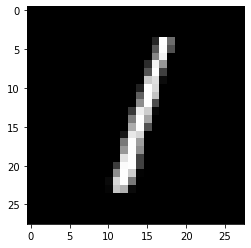

In [ ]:
print("Label:",y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

### Design a model

In [ ]:
first_layer_size = 64
random.seed(3)
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
#model.add(Dense(64, activation='sigmoid'))
#model.add(Dense(64,activation='sigmoid'))
#model.add(Dense(64,activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### Weights before Training

Shape of First Layer (784, 64)
Visualization of First Layer


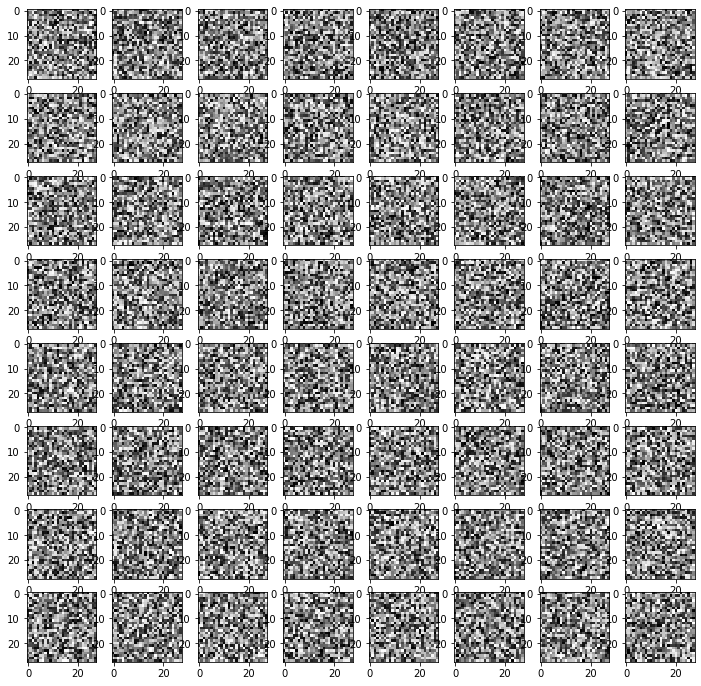

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/2
60000/60000 [==============================] - 2s 26us/step - loss: 0.6402 - acc: 0.8582
Epoch 2/2
60000/60000 [==============================] - 1s 24us/step - loss: 0.2810 - acc: 0.9222


### Testing

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2405828599512577
Test accuracy: 0.9304


### Weights after Training

Shape of First Layer (784, 64)
Visualization of First Layer


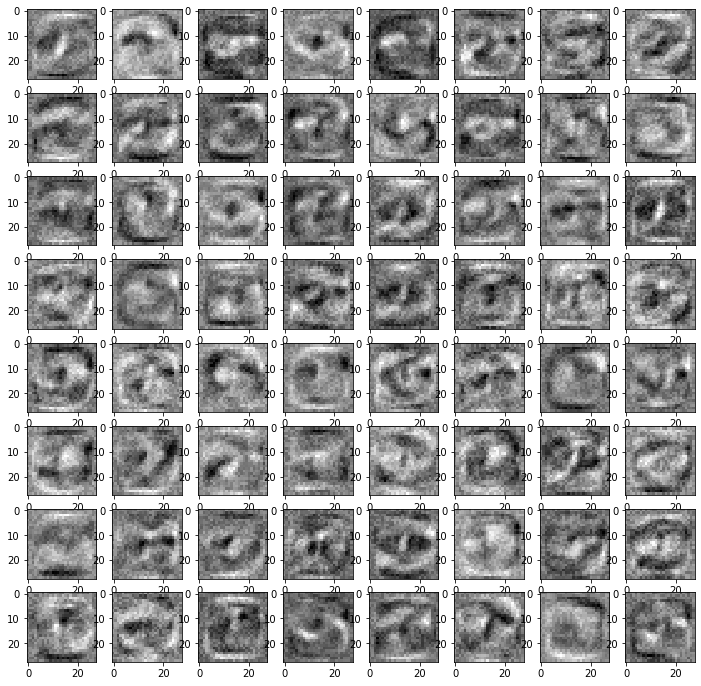

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
np.random.seed(3)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[255:256])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [3.6293339e-05 4.9925700e-04 9.6256239e-03 7.1918957e-02 5.6971575e-04
 7.8146282e-04 1.3022362e-05 8.9647853e-01 1.1740917e-03 1.8903084e-02]

Thresholded output
 [0 0 0 0 0 0 0 1 0 0]


### Ground truth

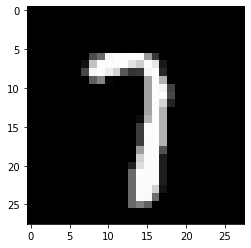

In [ ]:
# Write the index of the test sample to show
plt.imshow(x_test[255:256].reshape(28,28),cmap='gray')
plt.show()

### User Input

In [ ]:
from google.colab import drive as dt 
dt.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


In [ ]:
!dir

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
dir: cannot open directory '.': Transport endpoint is not connected


In [ ]:
import os 
os.chdir("/content/drive/My Drive/Notebooks")

In [ ]:
!dir


1.Python_Basics.ipynb		       digit.jpg
2.Neural_Network.ipynb		       model.h5
3.Convolutional_Neural_Networks.ipynb  model.json
4.Recurrent_Neural_Network.ipynb       pima-indians-diabetes.csv


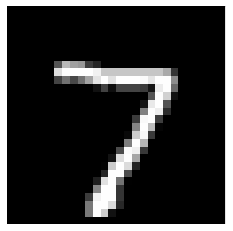

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('./digit.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

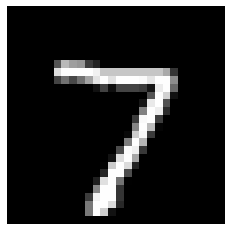

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('digit.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [1.0854485e-05 4.7880699e-06 2.9043411e-04 7.8315090e-04 1.0343049e-05
 3.3825505e-05 3.4598155e-08 9.9838650e-01 2.4538142e-06 4.7763833e-04]

Thresholded Score:
 [0 0 0 0 0 0 0 1 0 0]

Predicted Digit:
 7


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
60000/60000 [==============================] - 2s 28us/step - loss: 0.2261 - acc: 0.9358
Epoch 2/2
60000/60000 [==============================] - 2s 25us/step - loss: 0.1936 - acc: 0.9449
Test loss: 0.18002330032885075
Test accuracy: 0.9461


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [ ]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_9 (Dense)              (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 27us/step - loss: 1.2822 - acc: 0.5856 - val_loss: 0.6591 - val_acc: 0.8195
Epoch 2/2
60000/60000 [==============================] - 1s 20us/step - loss: 0.4953 - acc: 0.8599 - val_loss: 0.4025 - val_acc: 0.8841
Test loss: 0.40251649475097656
Test accuracy: 0.8841


### Relu Activation Function

In [ ]:
# Write your code here 

# Use the same model design from the above cell 

### What are your findings?

### Other Activation Functions
* model.add(Dense(8, activation='tanh'))
* model.add(Dense(8, activation='linear'))
* model.add(Dense(8, activation='hard_sigmoid'))

### Tips
* Relu is commonly used in most hidden layers
* In case of dead neurons, use leaky Relu

# Part 4: Design Choices in Neural Networks

### Design a model with Low Number of Nodes. For Example 8

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                170       
Total params: 51,722
Trainable params: 51,722
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 2s 34us/step - loss: 0.7296 - acc: 0.8031 - val_loss: 0.3642 - val_acc: 0.8979
Epoch 2/2
60000/60000 [==============================] - 2s 29

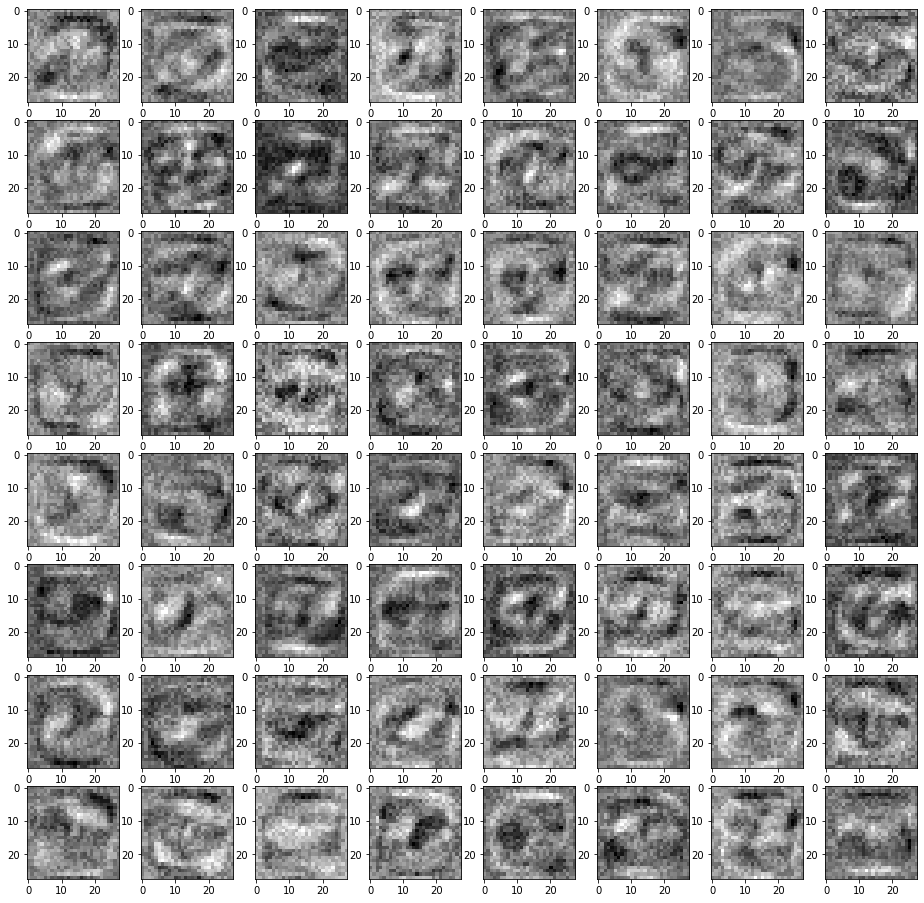

In [ ]:
first_layer_size = 64

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Design a model with Higher Number of Nodes. For example 128

In [ ]:
# Write your code here 

# Use the same layer design from the above cell 

### Lower number of Layers. For example 1 hidden layer

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                50        
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 1s 24us/step - loss: 1.6127 - acc: 0.4239 - val_loss: 1.2118 - val_acc: 0.5751
Epoch 2/2
60000/60000 [==============================] - 1s 16us/step - loss: 1.1081 - acc: 0.6213 - val_loss: 1.0082 - val_acc: 0.6526
Test loss: 1.0081772186279296
Test accuracy: 0.6526


### Lower number of Layers. For example 4 hidden layers

In [ ]:
# Write your code here 

# Use the same number of units from the above cell 


### Tips
* Choice of number of nodes and layers are application oriented i.e. trial and error
* Designing a neural network and reasoning the results is more of an art than a science